In [7]:
import pylhe
import os
import itertools
import hist
import math
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale = 2.5)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
#print(plt.rcParams.keys())
plt.rcParams['text.latex.preamble'] = r'\usepackage{color}'

## $\texttt{MadGraph}$

In [8]:
# Import lhe files generated by MadGraph
lhe_path_mu1e = './mu1e/mu1e_unweighted_events.lhe'
lhe_path_mu3e = './mu3e/mu3e_unweighted_events.lhe'
lhe_path_mu5e = './mu5e/mu5e_unweighted_events.lhe'

mu1e = pylhe.read_lhe_with_attributes(lhe_path_mu1e)
mu3e = pylhe.read_lhe_with_attributes(lhe_path_mu3e)
mu5e = pylhe.read_lhe_with_attributes(lhe_path_mu5e)

N_evt_mu1e = pylhe.read_num_events(lhe_path_mu1e)
N_evt_mu3e = pylhe.read_num_events(lhe_path_mu3e)
N_evt_mu5e = pylhe.read_num_events(lhe_path_mu5e)

print(f"Number of events mu1e: {pylhe.read_num_events(lhe_path_mu1e)}")
print(f"Number of events mu3e: {pylhe.read_num_events(lhe_path_mu3e)}")
print(f"Number of events mu5e: {pylhe.read_num_events(lhe_path_mu5e)}")

Number of events mu1e: 10000
Number of events mu3e: 10000
Number of events mu5e: 9000


In [9]:
event_mu1e = next(itertools.islice(mu1e, 1, 2))
event_mu3e = next(itertools.islice(mu3e, 1, 2))
event_mu5e = next(itertools.islice(mu5e, 1, 2))

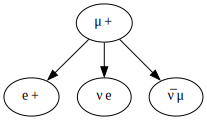

In [10]:
event_mu1e

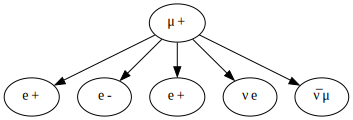

In [11]:
event_mu3e

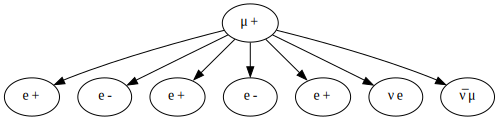

In [12]:
event_mu5e

In [13]:
pylhe.register_awkward()

# Create akward array objects for convinience
mu1e = pylhe.to_awkward(mu1e)
mu3e = pylhe.to_awkward(mu3e)
mu5e = pylhe.to_awkward(mu5e)

In [14]:
# Tree level muon decay
M_MU = 0.10566 # GeV 
M_E = 0.000511 # GeV
Gf = 1.16e-5 #GeV^-2
I = lambda x: 1 - 8*x - 12* x**2 * np.log(x) + 8*x**3 - x**4
Gamma_mu = ((Gf**2 * M_MU**5) / (192 * np.pi**3)) * I((M_E / M_MU)**2)
print('Total decay width: ', Gamma_mu, 'GeV')

# MadGraph returns (1e4 events):
# Gamma_mu1e = 3.009e-19 +/- 4.33e-22
BR_mu1e = 3.009e-19 / Gamma_mu

# Gamma_mu3e = 1.031e-23 +/- 2.5e-24
BR_mu3e = 1.031e-23 / Gamma_mu

# Gamma_mu5e = 1.32992e-28 +/- 3.54e-31
BR_mu5e = 1.32992e-28 / Gamma_mu

print('BR(mu1e) ~', BR_mu1e)
print('BR(mu3e) ~', BR_mu3e)
print('BR(mu5e) ~', BR_mu5e)

Total decay width:  2.976027382492985e-19 GeV
BR(mu1e) ~ 1.011079406628105
BR(mu3e) ~ 3.464349844578186e-05
BR(mu5e) ~ 4.4687760866163156e-10


In [15]:
# Iterate through each event and collect relevant daughter particle data
mu1e_positron1 = []
for event in mu1e:
    # Switching four-vector notation to (E, px, py, pz)
    for i, element in enumerate(event.particles):
        if element.id == -11 and i==1:
            mu1e_positron1.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))

mu1e_positron1 = np.array(mu1e_positron1)

In [53]:
print(mu1e_positron1[0])
print(mu1e_positron1[1])

[ 0.04812082  0.038509   -0.02698958 -0.01019669]
[ 0.01594049  0.01162336 -0.0002477  -0.01089377]


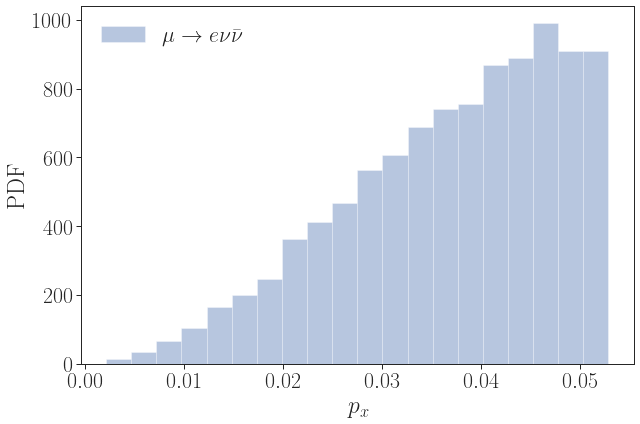

In [17]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.hist(mu1e_positron1[:,0], bins=20, alpha=0.4, label=r'$\mu \rightarrow e \nu \bar{\nu}$')
ax.set_xlabel(r'$p_x$')
ax.set_ylabel(r'$\mathrm{PDF}$')
ax.legend(frameon=False)
fig.tight_layout()

In [18]:
# Iterate through each event and collect relevant daughter particle data
mu3e_positron1, mu3e_positron3, mu3e_positron5, mu3e_electron2, mu3e_electron4 = [],[],[],[],[]
for event in mu3e:
    # Switching four-vector notation to (E, px, py, pz)
    for i, element in enumerate(event.particles):
        if element.id == -11 and i==1:
            mu3e_positron1.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))
            #print(i, element.vector.x)
        elif element.id == -11 and i==3:
            mu3e_positron3.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))
        elif element.id == 11 and i==2:
            mu3e_electron2.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))
            #print(i, element.vector.x)
            
mu3e_positron1 = np.array(mu3e_positron1)
mu3e_positron3 = np.array(mu3e_positron3)
mu3e_positron5 = np.array(mu3e_positron5)
mu3e_electron2 = np.array(mu3e_electron2)
mu3e_electron4 = np.array(mu3e_electron4)

In [19]:
print(mu3e_positron1[0])

[ 0.00536493  0.00480318 -0.00183597 -0.00144222]


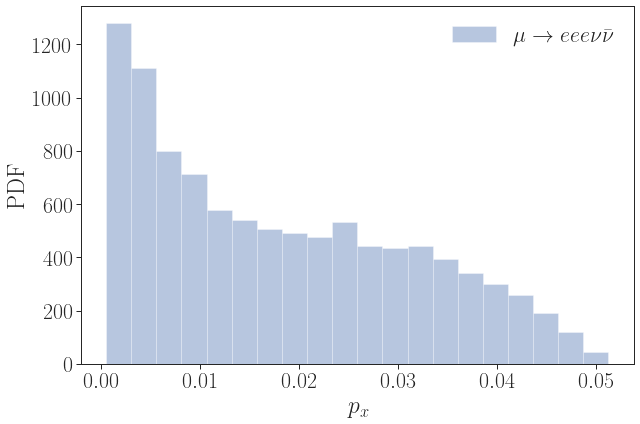

In [20]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.hist(mu3e_positron1[:,0], bins=20, alpha=0.4, label=r'$\mu \rightarrow \textcolor{red}{e} e e \nu \bar{\nu}$')
ax.set_xlabel(r'$p_x$')
ax.set_ylabel(r'$\mathrm{PDF}$')
ax.legend(frameon=False)
fig.tight_layout()

In [21]:
# Iterate through each event and collect relevant daughter particle data
mu5e_positron1, mu5e_positron3, mu5e_positron5, mu5e_electron2, mu5e_electron4 = [],[],[],[],[]
for event in mu5e:
    # Switching four-vector notation to (E, px, py, pz)
    for i, element in enumerate(event.particles):
        if element.id == -11 and i==1:
            mu5e_positron1.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))
            #print(i, element.vector.x)
        elif element.id == -11 and i==3:
            mu5e_positron3.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))
        elif element.id == -11 and i==5:
            mu5e_positron5.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))
        elif element.id == 11 and i==2:
            mu5e_electron2.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))
            #print(i, element.vector.x)
        elif element.id == 11 and i==4:
            mu5e_electron4.append(np.array([element.vector.t, element.vector.x, element.vector.y, element.vector.z]))
            
mu5e_positron1 = np.array(mu5e_positron1)
mu5e_positron3 = np.array(mu5e_positron3)
mu5e_positron5 = np.array(mu5e_positron5)
mu5e_electron2 = np.array(mu5e_electron2)
mu5e_electron4 = np.array(mu5e_electron4)

In [22]:
print(mu5e_positron1[0])
print(mu5e_positron1[1])
print(mu5e_positron3[0])
#print(mu5e_positron1[:,0])

[ 0.00941816 -0.00824154 -0.00449645  0.0005472 ]
[ 0.02189326  0.00947877  0.00123476 -0.01968965]
[ 0.00489675  0.00317942 -0.00296898 -0.00218941]


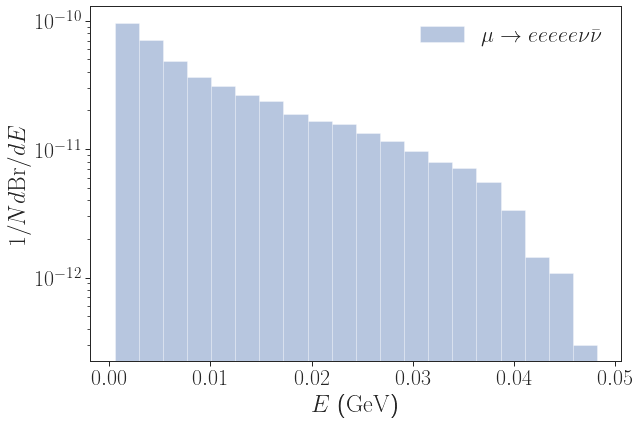

In [23]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.hist(mu5e_positron1[:,0], bins=20, alpha=0.4, weights = [BR_mu5e / N_evt_mu5e  for i in range(len(mu5e_positron1[:,0]))], label=r'$\mu \rightarrow \textcolor{red}{e} e e e e \nu \bar{\nu}$')
#ax.hist(mu5e_positron3[:,0], bins=60, alpha=0.4, weights = [1e-28 for i in range(len(mu5e_positron1[:,0]))])
#ax.hist(mu5e_positron5[:,0], bins=60, alpha=0.4, weights = [1e-28 for i in range(len(mu5e_positron1[:,0]))])
ax.set_xlabel(r'$E$ ($\mathrm{GeV}$)')
ax.set_ylabel(r'$1/N d\mathrm{Br}/dE$')
ax.legend(frameon=False)
ax.set_yscale('log')
fig.tight_layout()

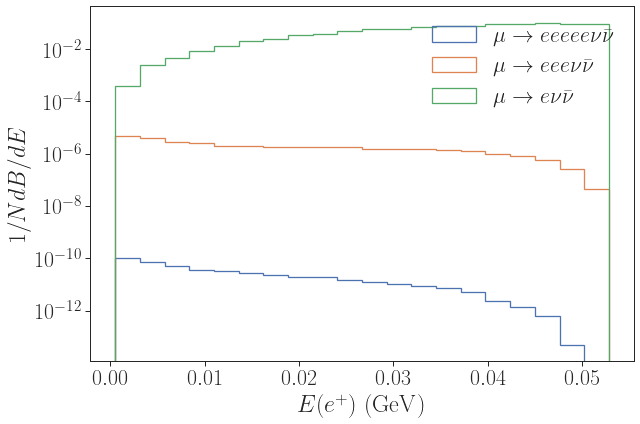

In [41]:
# Plot the primary electron energy histogram for each decay
bins = np.histogram(np.hstack(( mu5e_positron1[:,0], mu3e_positron1[:,0], mu1e_positron1[:,0] )), bins=20)[1]

fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.hist(mu5e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = [BR_mu5e / N_evt_mu5e  for i in range(len(mu5e_positron1[:,0]))], label=r'$\mu \rightarrow \textcolor{red}{e} e e e e \nu \bar{\nu}$')
ax.hist(mu3e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = [BR_mu3e / N_evt_mu3e  for i in range(len(mu3e_positron1[:,0]))], label=r'$\mu \rightarrow \textcolor{red}{e} e e \nu \bar{\nu}$')
ax.hist(mu1e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = [BR_mu1e / N_evt_mu1e  for i in range(len(mu1e_positron1[:,0]))], label=r'$\mu \rightarrow \textcolor{red}{e} \nu \bar{\nu}$')
ax.set_xlabel(r'$E(e^+)$ $(\mathrm{GeV})$')
ax.set_ylabel(r'$1/N dB/dE$')
ax.legend(frameon=False)
ax.set_yscale('log')
fig.tight_layout()

## $\texttt{phasespace}$

In [27]:
from phasespace import GenParticle

In [3]:
# Import the amplitudes generated by MadGraph
from mu1e.SubProcesses.P1_mup_epvevmx import matrix2py as M_mu1e
from mu3e.SubProcesses.P1_mup_epemepvevmx import matrix2py as M_mu3e
from mu5e.SubProcesses.P1_mup_epemepemepvevmx_no_zh import matrix2py as M_mu5e

# Initialize amplitude models
M_mu1e.initialisemodel('./mu1e/Cards/param_card.dat')
M_mu3e.initialisemodel('./mu3e/Cards/param_card.dat')
M_mu5e.initialisemodel('./mu5e/Cards/param_card.dat')

In [4]:
class Process:
    """
    Class to store the events generated by `phasespace`
    """
    
    def __init__(self, particles, weights, wmax=None, amp=None, branching=1.0):
        """
        Initialize the class and put format the momenta correctly
        """

        # output arrays from phasespace's generate(...)
        self.particles = particles
        self.weights = np.array(weights)
        self.wmax = np.array(wmax)

        self.branching = branching

        # amplitude module (already model initialised) from MG@5
        self.amp = amp
        self.alphaS = 0.12 # alpha strong -- not relevant for us.
        self.nhel = 0 # summ over all helicites -- TODO not sure how to use it in any other way...

        self.n_events = len(self.weights)

        # list of daughter particles
        self.daughter_names = list(self.particles.keys())

        # 4-momentum of the parent particle
        # self.p_parent = np.zeros_like(self.particles[self.daughter_names[0]])
        self.p_parent = np.sum([self.particles[k] for k in self.daughter_names], axis=0)
        
        self.put_energy_first()
        
        self.P_grid = self.build_P_grid()        
    
   
    def put_energy_first(self):
        # We need to rearrange the arrays so the first enetry is energy, and not px:
        # `phasespace` indices: 0 -> px, 1 -> py, 2 -> pz, 3 -> E
        # `MadGraph` and `DarkNews` indices: 0 -> E, 1 -> px, 2 -> py, 3 -> pz
        # when rearranging, also convert from TensorFlow object to numpy array
        for k in self.daughter_names:
            self.particles[k] = np.array(self.particles[k])[:,[3,0,1,2]]
        self.p_parent = self.p_parent[:,[3,0,1,2]]

    def build_P_grid(self):
        # dim 0: event number
        # dim 1: lorentz index
        # dim 2: particle number
        
        # Ordering --> Parent + daughters(following MadGraph convention)
        return np.transpose([self.p_parent] + [self.particles[k] for k in self.daughter_names], axes=(1,2,0) )
    
    def amp_in_P(self,P):
        if self.amp:
            return self.amp.get_value(P, self.alphaS, self.nhel)
    
    def amp_in_Pgrid(self):
        if self.amp:
            # loops over events and evaluates the amplitude given the list of momenta 
            self.w_amp = np.array([self.amp.get_value(self.P_grid[i], self.alphaS, self.nhel) for i in range(self.n_events)])
            self.w_final = self.w_amp * self.weights * self.branching / np.sum(self.w_amp * self.weights)

In [85]:
# Defining particles involved 
MPARENT = M_MU

numubar = GenParticle('nu_mu_bar', 0.0)
nue = GenParticle('nu_e', 0.0)

positron_0 = GenParticle('e+_0', M_E)

electron_1 = GenParticle('e-_1', M_E)
positron_1 = GenParticle('e+_1', M_E)

electron_2 = GenParticle('e-_2', M_E)
positron_2 = GenParticle('e+_2', M_E)

# µ -> ν_mu_bar ν_e e+
# !! Watch out for the ordering of the particles (following diagrams in MadGraph)
parent_muon_3body = GenParticle('mu+', MPARENT).set_children(positron_0, nue, numubar)

# µ -> ν_mu_bar ν_e e+ e+ e-
# !! Watch out for the ordering of the particles (following diagrams in MadGraph)
parent_muon_5body = GenParticle('mu+', MPARENT).set_children(positron_0, electron_1, positron_1, nue, numubar)

# µ -> ν_mu_bar ν_e e+ e+ e- e+ e-
# !! Watch out for the ordering of the particles (following diagrams in MadGraph)
parent_muon_7body = GenParticle('mu+', MPARENT).set_children(positron_0, electron_1, positron_1, electron_2, positron_2, nue, numubar)

# Generate the 4 momenta and weights
NEVENTS = 1e4

_weights, _wmax,  _particles = parent_muon_3body.generate(n_events=NEVENTS, normalize_weights=False)
m_mu1e = Process(_particles, _weights, wmax=_wmax, amp=M_mu1e, branching = 1)

# Generate the 4 momenta and weights
_weights, _wmax,  _particles = parent_muon_5body.generate(n_events=NEVENTS, normalize_weights=False)
m_mu3e = Process(_particles, _weights, wmax=_wmax, amp=M_mu3e, branching = BR_mu3e)

# Generate the 4 momenta and weights
_weights, _wmax,  _particles = parent_muon_7body.generate(n_events=1e5, normalize_weights=False)
m_mu5e = Process(_particles, _weights, wmax=_wmax, amp=M_mu5e, branching = BR_mu5e)

In [86]:
# Test the matrix element on a single event
print(M_mu1e.get_value(m_mu1e.P_grid[0], 0.0, -1))
print(M_mu3e.get_value(m_mu3e.P_grid[0], 0.0, -1))
print(M_mu5e.get_value(m_mu5e.P_grid[0], 0.0, -1))

4.7999505114105674e-14
1.6018050215134994e-11
5.029875731805026e-05


In [76]:
m_mu1e.amp_in_Pgrid()

In [77]:
m_mu3e.amp_in_Pgrid()

In [87]:
m_mu5e.amp_in_Pgrid()

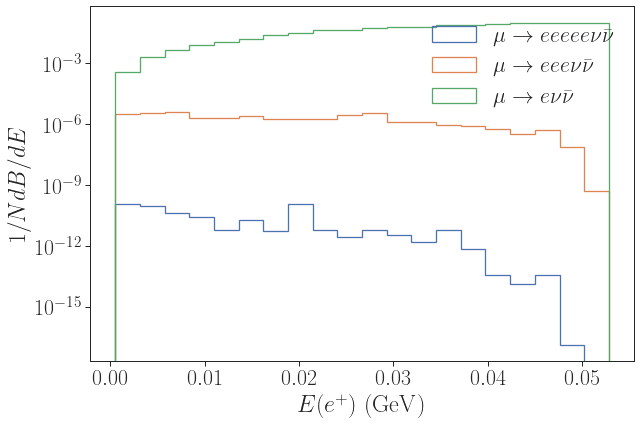

In [79]:
# Plot the primary electron energy histogram for each decay
fig, ax = plt.subplots(1,1,figsize=(9,6))
bins = np.histogram(np.hstack(( m_mu5e.particles['e+_0'][:,0], m_mu3e.particles['e+_0'][:,0], m_mu1e.particles['e+_0'][:,0] )), bins=20)[1]

ax.hist(m_mu5e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu5e.w_final, label=r'$\mu \rightarrow \textcolor{red}{e} e e e e \nu \bar{\nu}$')
ax.hist(m_mu3e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu3e.w_final, label=r'$\mu \rightarrow \textcolor{red}{e} e e \nu \bar{\nu}$')
ax.hist(m_mu1e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu1e.w_final, label=r'$\mu \rightarrow \textcolor{red}{e} \nu \bar{\nu}$')
ax.set_xlabel(r'$E(e^+)$ $(\mathrm{GeV})$')
ax.set_ylabel(r'$1/N dB/dE$')
ax.legend(frameon=False)
ax.set_yscale('log')
fig.tight_layout()

## Comparison

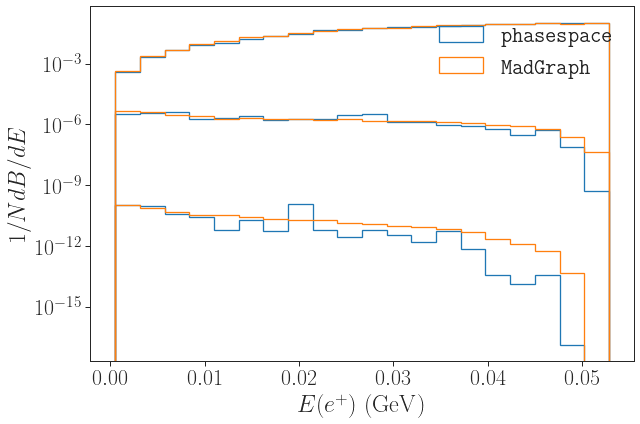

In [80]:
# Compare phasespace and MadGraph
fig, ax = plt.subplots(1,1,figsize=(9,6))
bins = np.histogram(np.hstack(( m_mu5e.particles['e+_0'][:,0], m_mu3e.particles['e+_0'][:,0], m_mu1e.particles['e+_0'][:,0], mu5e_positron1[:,0], mu3e_positron1[:,0], mu1e_positron1[:,0] )), bins=20)[1]

ax.hist(m_mu5e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu5e.w_final, color = 'tab:blue', label=r'$\texttt{phasespace}$')
ax.hist(m_mu3e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu3e.w_final, color = 'tab:blue')
ax.hist(m_mu1e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu1e.w_final, color = 'tab:blue')
ax.hist(mu5e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu5e / N_evt_mu5e  for i in range(len(mu5e_positron1[:,0]))], label=r'$\texttt{MadGraph}$')
ax.hist(mu3e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu3e / N_evt_mu3e  for i in range(len(mu3e_positron1[:,0]))])
ax.hist(mu1e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu1e / N_evt_mu1e  for i in range(len(mu1e_positron1[:,0]))])
ax.set_xlabel(r'$E(e^+)$ $(\mathrm{GeV})$')
ax.set_ylabel(r'$1/N dB/dE$')
ax.legend(frameon=False)
ax.set_yscale('log')
fig.tight_layout()
fig.savefig(r'phasespace_vs_MadGraph_E_positron_N_1e4.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

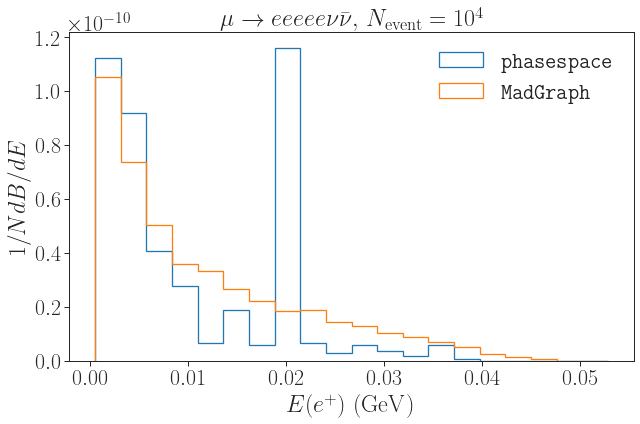

In [81]:
# Compare phasespace (9k events) and MadGraph (9k events)
fig, ax = plt.subplots(1,1,figsize=(9,6))
bins = np.histogram(np.hstack(( m_mu5e.particles['e+_0'][:,0], m_mu3e.particles['e+_0'][:,0], m_mu1e.particles['e+_0'][:,0], mu5e_positron1[:,0], mu3e_positron1[:,0], mu1e_positron1[:,0] )), bins=20)[1]

ax.hist(m_mu5e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu5e.w_final, color = 'tab:blue', label=r'$\texttt{phasespace}$')
#ax.hist(m_mu3e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu3e.w_final, color = 'tab:blue')
#ax.hist(m_mu1e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu1e.w_final, color = 'tab:blue')
ax.hist(mu5e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu5e / N_evt_mu5e  for i in range(len(mu5e_positron1[:,0]))], label=r'$\texttt{MadGraph}$')
#ax.hist(mu3e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu3e / N_evt_mu3e  for i in range(len(mu3e_positron1[:,0]))])
#ax.hist(mu1e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu1e / N_evt_mu1e  for i in range(len(mu1e_positron1[:,0]))])
ax.set_title(r'$\mu \rightarrow eeeee\nu\bar{\nu},$ $N_{\mathrm{event}} = 10^4$')
ax.set_xlabel(r'$E(e^+)$ $(\mathrm{GeV})$')
ax.set_ylabel(r'$1/N dB/dE$')
ax.legend(frameon=False)
fig.tight_layout()
fig.savefig(r'mu5e_phasespace_vs_MadGraph_E_positron_N_1e4.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

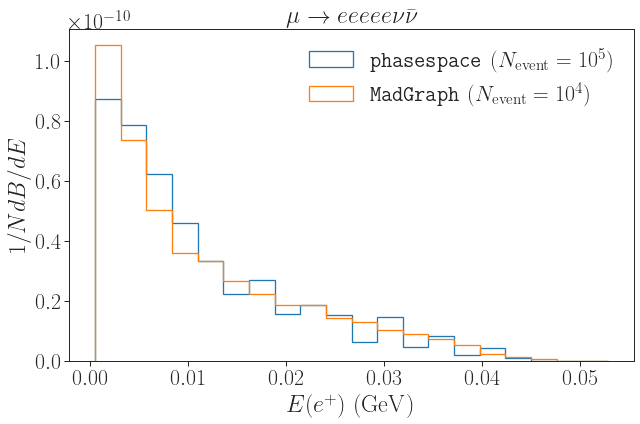

In [88]:
# Compare phasespace (1e5 events) and MadGraph (9k events)
fig, ax = plt.subplots(1,1,figsize=(9,6))
bins = np.histogram(np.hstack(( m_mu5e.particles['e+_0'][:,0], m_mu3e.particles['e+_0'][:,0], m_mu1e.particles['e+_0'][:,0], mu5e_positron1[:,0], mu3e_positron1[:,0], mu1e_positron1[:,0] )), bins=20)[1]

ax.hist(m_mu5e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu5e.w_final, color = 'tab:blue', label=r'$\texttt{phasespace}$ $(N_{\mathrm{event}} = 10^5)$')
#ax.hist(m_mu3e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu3e.w_final, color = 'tab:blue')
#ax.hist(m_mu1e.particles['e+_0'][:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, weights = m_mu1e.w_final, color = 'tab:blue')
ax.hist(mu5e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu5e / N_evt_mu5e  for i in range(len(mu5e_positron1[:,0]))], label=r'$\texttt{MadGraph}$ $(N_{\mathrm{event}} = 10^4)$')
#ax.hist(mu3e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu3e / N_evt_mu3e  for i in range(len(mu3e_positron1[:,0]))])
#ax.hist(mu1e_positron1[:,0], bins=bins, alpha=1.0, histtype='step', lw=1.3, color='tab:orange', weights = [BR_mu1e / N_evt_mu1e  for i in range(len(mu1e_positron1[:,0]))])
ax.set_title(r'$\mu \rightarrow eeeee\nu\bar{\nu}$ ')
ax.set_xlabel(r'$E(e^+)$ $(\mathrm{GeV})$')
ax.set_ylabel(r'$1/N dB/dE$')
ax.legend(frameon=False)
fig.tight_layout()
fig.savefig(r'mu5e_phasespace_vs_MadGraph_E_positron.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')